##### The cell below is for you to keep track of the libraries used and install those libraries quickly
##### Ensure that the proper library names are used and the syntax of `%pip install PACKAGE_NAME` is followed

## **DO NOT CHANGE** the filepath variable
##### Instead, create a folder named 'data' in your current working directory and
##### have the .parquet file inside that. A relative path *must* be used when loading data into pandas

In [2]:
# Can have as many cells as you want for code
import pandas as pd
filepath = "./data/catB_train.parquet"
# the initialised filepath MUST be a relative path to a folder named data that contains the parquet file

### **ALL** Code for machine learning and dataset analysis should be entered below.
##### Ensure that your code is clear and readable.
##### Comments and Markdown notes are advised to direct attention to pieces of code you deem useful.

In [3]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
import joblib

In [18]:
df = pd.read_parquet(filepath)

### Train-test split

In [68]:
Y = df["f_purchase_lh"].fillna(0)
Y

X = df.loc[:, df.columns != "f_purchase_lh"]
X


,clntnum,race_desc,ctrycode_desc,clttype,stat_flag,min_occ_date,cltdob_fix,cltsex_fix,flg_substandard,flg_is_borderline_standard,...,giclaim_amt,recency_giclaim,giclaim_cnt_success,recency_giclaim_success,giclaim_cnt_unsuccess,recency_giclaim_unsuccess,flg_gi_claim_29d435_ever,flg_gi_claim_058815_ever,flg_gi_claim_42e115_ever,flg_gi_claim_856320_ever
19550,91b546e924,Chinese,Singapore,P,ACTIVE,2017-10-31,1974-05-09,Female,0.0,0.0,...,None,NaN,None,None,None,None,None,None,None,None
4600,896bae548c,Chinese,Singapore,P,ACTIVE,2007-05-23,1979-11-11,Male,0.0,0.0,...,None,NaN,None,None,None,None,None,None,None,None
13337,f364439ae6,Others,Singapore,P,ACTIVE,2019-08-31,1976-01-28,Male,0.0,0.0,...,None,NaN,None,None,None,None,None,None,None,None
15074,70f319cfe1,Chinese,Singapore,P,ACTIVE,2021-10-18,1976-03-19,Female,0.0,0.0,...,None,NaN,None,None,None,None,None,None,None,None
19724,2647a81328,Chinese,Singapore,P,ACTIVE,2018-07-20,1995-07-31,Female,0.0,0.0,...,None,NaN,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,3363260248,None,Singapore,P,LAPSED,2016-08-01,1994-05-24,Male,0.0,0.0,...,None,NaN,None,None,None,None,None,None,None,None
11964,c3509f0aef,Chinese,Singapore,P,ACTIVE,1990-03-20,1948-12-16,Male,0.0,0.0,...,None,NaN,None,None,None,None,None,None,None,None
5390,6e44cfb3e7,Chinese,Singapore,P,ACTIVE,2007-12-31,1967-12-06,Female,0.0,0.0,...,None,NaN,None,None,None,None,None,None,None,None
860,dd4e362f9f,Others,Singapore,P,ACTIVE,2007-09-01,1986-04-01,Male,0.0,0.0,...,None,NaN,None,None,None,None,None,None,None,None


In [69]:
Y = df["f_purchase_lh"].fillna(0)
X = df.loc[:, df.columns != "f_purchase_lh"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 26)

print(f"This is X_train.shape: {X_train.shape}")
print(f"This is Y_train.shape: {Y_train.shape}")
print(f"This is X_test.shape: {X_test.shape}")
print(f"This is Y_test.shape: {Y_test.shape}")


This is X_train.shape: (14393, 303)
This is Y_train.shape: (14393,)
This is X_test.shape: (3599, 303)
This is Y_test.shape: (3599,)


# EDA

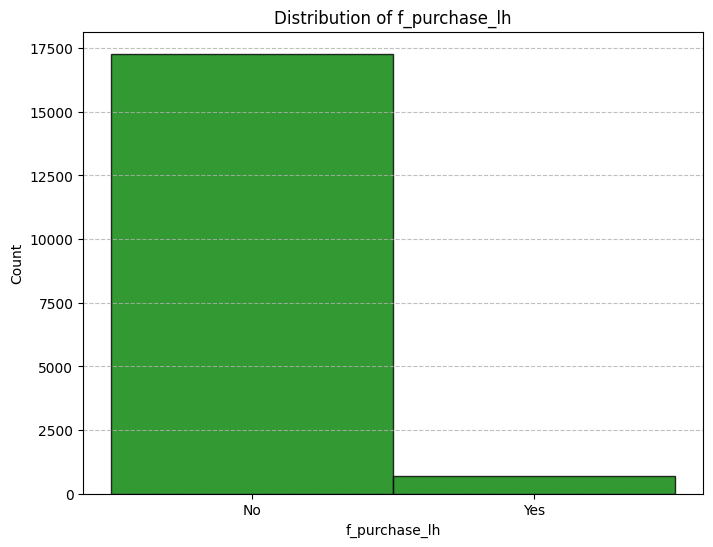

In [12]:
import matplotlib.pyplot as plt

df_bar = df[["f_purchase_lh"]]
df_bar = df_bar.fillna(0)
f_purchase_lh2 = df_bar['f_purchase_lh']

#histogram of the distribution
plt.figure(figsize=(8, 6))
plt.hist(f_purchase_lh2, bins=[-0.5, 0.5, 1.5], color='green', edgecolor='black', alpha=0.8)
plt.xlabel('f_purchase_lh')
plt.ylabel('Count')
plt.title('Distribution of f_purchase_lh')
plt.xticks([0, 1], ['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.show()

The histogram above shows the distribution of our target class - "f_purchase_lh" in the original dataframe. From the plot, we can see that the dataset is heavily imbalanced with "Yes" being much less represented than "No". This indicates that "Yes" is the minority class and "No" is the majority class. In this case, downsampling and SMOTE would be necessary as to prevent the model from being biased towards the majority class ("No") due to the severe imblance in classes.

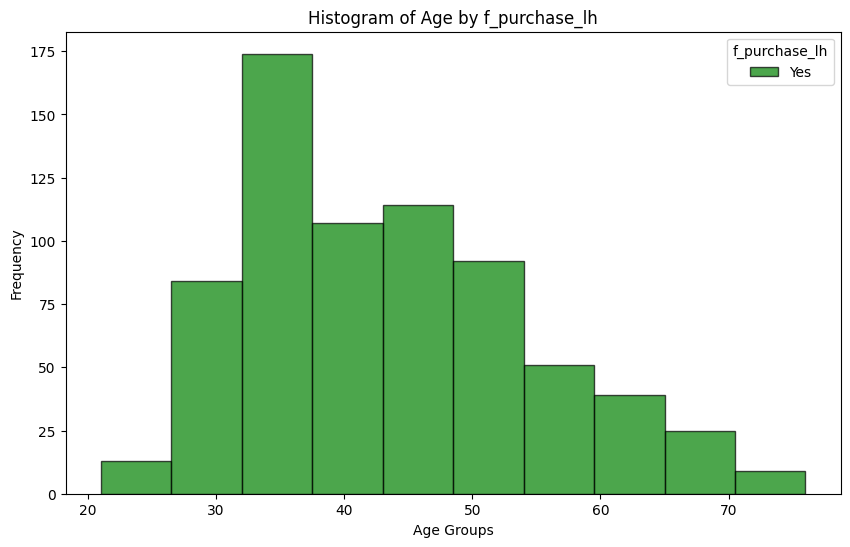

In [13]:
import warnings
warnings.filterwarnings("ignore")

df_age = df[["cltdob_fix", "f_purchase_lh"]]
df_age["Age"] = pd.to_datetime(df["cltdob_fix"], format="%Y-%m-%d", errors='coerce')
df_age["Age_in_years"] = df_age["Age"].dt.year
df_age["Current_Age"] = 2024 - df_age["Age_in_years"]
category_1 = df_age[df_age["f_purchase_lh"] == 1]["Current_Age"]

# Plot histograms
plt.figure(figsize=(10, 6))
plt.hist(category_1, bins=10, alpha=0.7, label='Yes', color='g', edgecolor='black')

# Add labels and title
plt.xlabel('Age Groups')
plt.ylabel('Frequency')
plt.title('Histogram of Age by f_purchase_lh')
plt.legend(title = "f_purchase_lh")

We plotted a histogram to visualise the distribution of ages for individuals who have purchased life insurance (‘f_purchase_lh’ =1). As seen from the plot, the frequency of insurance purchases increases with the age of the individual, reaching a peak of around 35 years, and then declines. Singlife can perhaps implement more targeted marketing strategies to individuals aged 40 and older as it is surprising that there is a decline in insurance purchases among this demographic because research has shown that individuals around this age become increasingly susceptible to illnesses.

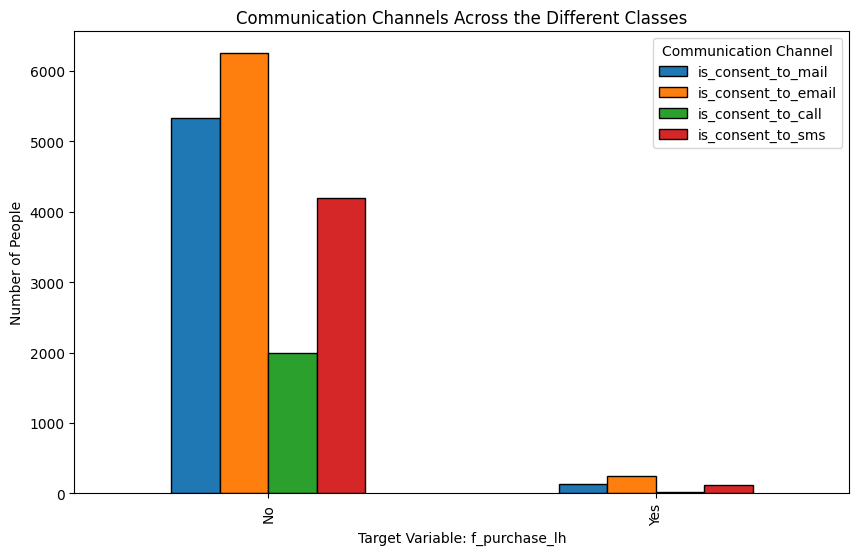

In [14]:
comms = ['is_consent_to_mail', 'is_consent_to_email', 'is_consent_to_call', 'is_consent_to_sms', "f_purchase_lh"]
df_comms = df[comms]
df_comms = df_comms.fillna(0)
df_comms_summary = df_comms.groupby(["f_purchase_lh"]).agg({
    "is_consent_to_mail" : 'sum',
    "is_consent_to_email" : "sum",
    "is_consent_to_call" : "sum",
    "is_consent_to_sms" : "sum",
})

df_comms_summary.plot(kind="bar", figsize = (10, 6), edgecolor='black')
plt.xlabel("Target Variable: f_purchase_lh")
plt.ylabel("Number of People")
plt.xticks([0, 1], ['No', 'Yes'])
plt.title("Communication Channels Across the Different Classes")
plt.legend(title = "Communication Channel")

This plot illustrates consumer preferences on communication channels. From the graph, we can see regardless of whether the customer intends to buy life or health insurance products over the next 3 months, email, mail, and SMS are the preferred modes of communication. Calls are the least popular mode of communication amongst consumers. Based on this data, Singlife may consider focusing its marketing efforts on email, mail, and SMS channels as consumers are more likely to see them compared to through phone calls.


### Data preprocessing

1. Removing clntnum The clntnum columns is removed since it is irrelevent to predicting the outptu

2. Deal with date columns The date columns, 'min_occ_date','cltdob_fix', were processed from datetime string to number of days from jan 2024.

3. Settle Categorical Variables The nominal categorical variables are one hot encoded while the ordinal variables are mapped to integer values

4. Feature Engineering: Refer to Below

5. Processing product columns Based on the f_ever_bought_* columns, if a product is never bought by a customer, we set its values in all related columns to zero for that customer, to standardize the data. If an f_ever_bought_* column is entirely zero for all rows, no customers has bought it in the data and we therefore remove all columns associated with that product

6. Dropping high NaN columns: The proportion of NaN values was computed for each columns and those with the highest proportion was dropped.

7. Dropping of low variability features

8. Scaling We scaled all continuous variables to a standard normal distribution, and created a scaler object to apply onto the test set

9. Imputation Using a KNN imputer, we imputed the remaining NaN values by taking the mean of the 5 nearest neighbours. The imputed binary variables are then rounded off to the nearest 0 or 1.

### Feature Engineering

We created the column “total_prems_paid” by summing all columns with the ‘prempaid_’ prefix. This allows us to see the sum of premium payments paid by each customer.

We then added a new column called‘LDMU_total_prems_paid’. This column is created by square rooting the ‘total_prems_paid’ column. We consider the law of diminishing marginal utility (LDMU) in this case as buying more premiums is unlikely to add much value to a customer if they have already paid for a lot of premiums. So, we square root the ‘total_prems_paid’ as LDMU is a concave function and the square root function is also a concave one.

A ‘purchasing_power’ column which is the ratio of annual income to household size is also added. This allows us to find out if purchasing power could be a possibility as to why a consumer may or may not want to purchase insurance products.

The column ‘LDMU_Age_Limit’ is created by taking the natural logarithm of the difference between 75 years in days and ‘cltdob_fix’ in days. Values exceeding 75 years are truncated to 0. This is because insurance policies often have an age limit of 75 years old. Taking 75 – the current age of the person will give us an idea of the remaining policy time left for the customer. The natural logarithm is applied due to the law of diminishing marginal utility (LDMU) as we believe that the marginal utility derived from purchasing insurance may diminish as individuals approach the age limit of 75. This is because, they may not have much time left. Since the curve in the law of diminishing marginal utility is concave, we decided to take the natural logarithm so that the variable will also be concave considering the natural logarithm is a concave function.
    
   


In [ ]:
# Step 1: Remove clntnum
X_train = X_train.drop('clntnum', axis=1)
# X_test = X_test.drop('clntnum', axis=1)

# Step 2: Deal with date columns

# Calculates time column based of 1 jan 2024
def parseDatetime(col):
    col = pd.to_datetime(col, format="%Y-%m-%d", errors='coerce')
    col = pd.to_datetime("2024-01-01") - col
    col = pd.to_numeric(col.dt.days, errors='coerce').astype('Int64')
    return col

datetime_col = ['min_occ_date','cltdob_fix']

for col in datetime_col:
    X_train[col] = parseDatetime(X_train[col]).astype('Int64')
    # X_test[col] = parseDatetime(X_test[col]).astype('Int64')

# Step 3
# a) One hot Encode nominal Variables
nominal_cols = ["race_desc", "ctrycode_desc", "clttype", "stat_flag", "cltsex_fix"]
X_train = pd.get_dummies(X_train, columns=nominal_cols)
# X_test = pd.get_dummies(X_test, columns=nominal_cols)

ordinal_cols = ["annual_income_est", "hh_size_est"]

# b) Label Encode ordinal variables
le = LabelEncoder()
m = {'C.60K-100K': 3, 'D.30K-60K': 2, 'E.BELOW30K':1, 'B.100K-200K':4, 'A.ABOVE200K' : 5, None: None}
X_train["annual_income_est"] = X_train["annual_income_est"].map(m)
# X_test["annual_income_est"] = X_test["annual_income_est"].map(m)
m = {'3': 3, '2': 2, '1':1, '4':4, '>4' : 5, '0' :0, None: None}
X_train["hh_size_est"] = X_train["hh_size_est"].map(m)
X_test["hh_size_est"] = X_test["hh_size_est"].map(m)

# Step 4
prem_paid_cols = [s for s in X_train.columns if "prempaid_" in s]
X_train["total_prems_paid"] = X_train[prem_paid_cols].sum(axis = 1)
X_train["LDMU_total_prems_paid"] = X_train["total_prems_paid"]**0.5
X_train['purchasing_power'] = X_train['annual_income_est'] / X_train['hh_size_est']
X_train['LDMU_Age_Limit'] = np.log((75*365) - X_train['cltdob_fix'])
X_train.loc[((75*365 - X_train["cltdob_fix"]) < 0), "LDMU_Age_Limit"] = 0 #Setting those aged 75 years and above to have ln(*) = 0


# Step 5: Impute specific insurance products stuff with 0s because if they never bought certain columns would not apply to them
# dropped_cols: because they have 0 variability in data
prod_cols = [s for s in X_train.columns if "f_ever_bought_" in s]
prod_names = [s[14:] for s in prod_cols]
sorted_products = sorted(prod_cols, key = lambda x: sum(X_train[x]), reverse = True) #sort my number of users bought

# zero variability columns
dropped_cols = [c for c in X_train.columns if (((len(X_train[c].unique())) < 3) and (X_train[c].isna().any())) or len(X_train[c].unique()) == 1]
# dropped_cols = ['giclaim_cnt_success', "flg_gi_claim_29d435_ever", "flg_gi_claim_058815_ever", "flg_gi_claim_42e115_ever", "flg_gi_claim_856320_ever", 'n_months_last_bought_d0adeb', 'n_months_last_bought_ltc_1280bf', 'n_months_last_bought_inv_dcd836', 'n_months_last_bought_lh_d0adeb', 'lapse_ape_ltc_1280bf', 'lapse_ape_inv_dcd836', 'lapse_ape_lh_d0adeb', 'lapse_ape_32c74c', 'n_months_since_lapse_ltc_1280bf', 'n_months_since_lapse_inv_dcd836', 'n_months_since_lapse_lh_d0adeb', 'n_months_since_lapse_32c74c']
# dropped_cols += sorted_products[10:]
X_train = X_train.drop(dropped_cols,axis=1)

prod_cols = [s for s in X_train.columns if "f_ever_bought_" in s] #after dropping
prod_names = [s[14:] for s in prod_cols]
dropped_f_ever_bought_cols = [s for s in dropped_cols if "f_ever_bought_" in s]
dropped_prod_names = [s[14:] for s in dropped_f_ever_bought_cols]
df_list = []

#match product cols with f_ever_bought
for i in prod_names:
    cols_containing_prod_names = [s for s in X_train.columns if i in s and i != "f_ever_bought_"+i]
    f_ever_bought_ = X_train["f_ever_bought_"+i]
    for col in cols_containing_prod_names:
        rows_not_bought = X_train[col][f_ever_bought_==0]
        value_to_match = 0
        '''
        for v in rows_not_bought.unique():
            if not pd.isna(v) and v != 0:
                value_to_match = v
            elif pd.isna(v):
                value_to_match = v
        '''
        X_train.loc[f_ever_bought_==0, col] = X_train.loc[f_ever_bought_==0, col].apply(lambda x: value_to_match)

#if prod nv bought for all, remove all related columns
col_to_drop = []
for i in dropped_prod_names:
    col_to_drop += [s for s in X_train.columns if i in s]
X_train = X_train.drop(col_to_drop,axis=1, errors='ignore')

#drop remaining high nan cols
na_ratio = []
for column in X_train.columns:
    num_zero = (pd.isna(X_train[column])).sum()
    tot_ele = len(X_train[column])
    na_ratio += [(column, num_zero / tot_ele)]

na_ratio = sorted(na_ratio, key =lambda x: x[1], reverse = True)
drop_high_nan = [s[0] for s in na_ratio[:29]]
X_train = X_train.drop(drop_high_nan,axis=1, errors='ignore')


# Step 6
object_columns = X_train.select_dtypes(include=['object']).columns
for c in object_columns:
    X_train[c] = pd.to_numeric(X_train[c], errors='coerce')
    # print(X_train[c].unique())


In [ ]:
# Scaling
binary_columns = X_train.columns[(X_train.eq(0) | X_train.eq(1) | X_train.isna()).all()]
continuous_columns = [s for s in X_train.columns if s not in binary_columns]
X_train_continuous = X_train[continuous_columns]
X_train_binary = X_train[binary_columns]
scaler = StandardScaler()
scaler.fit(X_train_continuous)
columns = X_train_continuous.columns
X_train_continuous = scaler.transform(X_train_continuous)
X_train_continuous = pd.DataFrame(X_train_continuous, columns=continuous_columns)
X_train_binary = X_train_binary.reset_index(drop=True)
X_train = pd.concat([X_train_binary,X_train_continuous], axis=1)

# Knn imputer
imputer = KNNImputer(n_neighbors=5)
X_train = imputer.fit_transform(X_train)

# Rounding of Binary Variables
columns = pd.concat([X_train_binary,X_train_continuous], axis=1).columns
X_train_presampled = pd.DataFrame(X_train, columns = columns)
X_train_presampled[binary_columns] = X_train_presampled[binary_columns].round(decimals=0)

In [ ]:
columns = pd.concat([X_train_binary,X_train_continuous], axis=1).columns
X_train_presampled = pd.DataFrame(X_train, columns = columns)
X_train_presampled[binary_columns] = X_train_presampled[binary_columns].round(decimals=0)

#The cell below is **NOT** to be removed
##### The function is to be amended so that it accepts the given input (dataframe) and returns the required output (list).
##### It is recommended to test the function out prior to submission
-------------------------------------------------------------------------------------------------------------------------------
##### The hidden_data parsed into the function below will have the same layout columns wise as the dataset *SENT* to you
##### Thus, ensure that steps taken to modify the initial dataset to fit into the model are also carried out in the function below

In [10]:
# Oversample with SMOTE and random undersample for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot


In [80]:
# preprocess_train is used to preprocess the training data to return certain things that would be used to process the test data
def preprocess_train():
  # Step 1: Remove clntnum
  df = pd.read_parquet('./data/catB_train.parquet')
  Y = df["f_purchase_lh"].fillna(0)
  X = df.loc[:, df.columns != "f_purchase_lh"]
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 26)
  print(f"This is X_train.shape: {X_train.shape}")
  print(f"This is Y_train.shape: {Y_train.shape}")
  print(f"This is X_test.shape: {X_test.shape}")
  print(f"This is Y_test.shape: {Y_test.shape}")

#   Y = training["f_purchase_lh"].fillna(0)
#   print(Y.shape)
#   X = training.loc[:, training.columns != "f_purchase_lh"]
#   print(X.shape)
#   X_train, _, Y_train, _ = train_test_split(X, Y, test_size = 0.2, random_state = 26)
  X_train = X_train.drop('clntnum', axis=1)
  # X_test = X_test.drop('clntnum', axis=1)
#   print(Y_train.shape)
#   print(X_train.shape)
  # Step 2: Deal with date columns
  # Calculates time column based of 1 jan 2024
  def parseDatetime(col):
      col = pd.to_datetime(col, format="%Y-%m-%d", errors='coerce')
      col = pd.to_datetime("2024-01-01") - col
      col = pd.to_numeric(col.dt.days, errors='coerce').astype('Int64')
      return col

  datetime_col = ['min_occ_date','cltdob_fix']

  for col in datetime_col:
      X_train[col] = parseDatetime(X_train[col]).astype('Int64')
      # X_test[col] = parseDatetime(X_test[col]).astype('Int64')

  # Step 3
  # a) One hot Encode nominal Variables
  nominal_cols = ["race_desc", "ctrycode_desc", "clttype", "stat_flag", "cltsex_fix"]
  X_train = pd.get_dummies(X_train, columns=nominal_cols)
  # X_test = pd.get_dummies(X_test, columns=nominal_cols)
  
  ordinal_cols = ["annual_income_est", "hh_size_est"]

  # b) Label Encode ordinal variables
  le = LabelEncoder()
  m = {'C.60K-100K': 3, 'D.30K-60K': 2, 'E.BELOW30K':1, 'B.100K-200K':4, 'A.ABOVE200K' : 5, None: None}
  X_train["annual_income_est"] = X_train["annual_income_est"].map(m)
  # X_test["annual_income_est"] = X_test["annual_income_est"].map(m)
  m = {'3': 3, '2': 2, '1':1, '4':4, '>4' : 5, '0' :0, None: None}
  X_train["hh_size_est"] = X_train["hh_size_est"].map(m)
#   X_test["hh_size_est"] = X_test["hh_size_est"].map(m)
  print(X_train.shape)
  # Step 4 Feature Engineer
  prem_paid_cols = [s for s in X_train.columns if "prempaid_" in s]
  X_train["total_prems_paid"] = X_train[prem_paid_cols].sum(axis = 1)
  X_train["LDMU_total_prems_paid"] = X_train["total_prems_paid"].astype('float') **0.5
  X_train['purchasing_power'] = X_train['annual_income_est'] / X_train['hh_size_est']
  X_train['LDMU_Age_Limit'] = np.log((75*365) - X_train['cltdob_fix'])
  X_train.loc[((75*365 - X_train["cltdob_fix"]) < 0), "LDMU_Age_Limit"] = 0 #Setting those aged 75 years and above to have ln(*) = 0
  print(X_train.shape)

  # Step 5: Impute specific insurance products stuff with 0s because if they never bought certain columns would not apply to them
  # dropped_cols: because they have 0 variability in data
  prod_cols = [s for s in X_train.columns if "f_ever_bought_" in s]
  prod_names = [s[14:] for s in prod_cols]
  sorted_products = sorted(prod_cols, key = lambda x: sum(X_train[x]), reverse = True) #sort my number of users bought

  # zero variability columns
  dropped_cols = [c for c in X_train.columns if (((len(X_train[c].unique())) < 3) and (X_train[c].isna().any())) or len(X_train[c].unique()) == 1]
  # dropped_cols = ['giclaim_cnt_success', "flg_gi_claim_29d435_ever", "flg_gi_claim_058815_ever", "flg_gi_claim_42e115_ever", "flg_gi_claim_856320_ever", 'n_months_last_bought_d0adeb', 'n_months_last_bought_ltc_1280bf', 'n_months_last_bought_inv_dcd836', 'n_months_last_bought_lh_d0adeb', 'lapse_ape_ltc_1280bf', 'lapse_ape_inv_dcd836', 'lapse_ape_lh_d0adeb', 'lapse_ape_32c74c', 'n_months_since_lapse_ltc_1280bf', 'n_months_since_lapse_inv_dcd836', 'n_months_since_lapse_lh_d0adeb', 'n_months_since_lapse_32c74c']
  # dropped_cols += sorted_products[10:]
  X_train = X_train.drop(dropped_cols,axis=1)

  prod_cols = [s for s in X_train.columns if "f_ever_bought_" in s] #after dropping
  prod_names = [s[14:] for s in prod_cols]
  dropped_f_ever_bought_cols = [s for s in dropped_cols if "f_ever_bought_" in s]
  dropped_prod_names = [s[14:] for s in dropped_f_ever_bought_cols]
  df_list = []
 
  #match product cols with f_ever_bought
  for i in prod_names:
      cols_containing_prod_names = [s for s in X_train.columns if i in s and i != "f_ever_bought_"+i]
      f_ever_bought_ = X_train["f_ever_bought_"+i]
      for col in cols_containing_prod_names:
          rows_not_bought = X_train[col][f_ever_bought_==0]
          value_to_match = 0
          '''
          for v in rows_not_bought.unique():
              if not pd.isna(v) and v != 0:
                  value_to_match = v
              elif pd.isna(v):
                  value_to_match = v
          '''
          X_train.loc[f_ever_bought_==0, col] = X_train.loc[f_ever_bought_==0, col].apply(lambda x: value_to_match)
  print(X_train.shape)
  #if prod nv bought for all, remove all related columns
  col_to_drop = []
  for i in dropped_prod_names:
      col_to_drop += [s for s in X_train.columns if i in s]
  X_train = X_train.drop(col_to_drop,axis=1, errors='ignore')
  print(X_train.shape)
  #drop remaining high nan cols
  na_ratio = []
  for column in X_train.columns:
      num_zero = (pd.isna(X_train[column])).sum()
      tot_ele = len(X_train[column])
      na_ratio += [(column, num_zero / tot_ele)]

  na_ratio = sorted(na_ratio, key =lambda x: x[1], reverse = True)
  drop_high_nan = [s[0] for s in na_ratio[:29]]
  X_train = X_train.drop(drop_high_nan,axis=1, errors='ignore')


  # Step 6
  object_columns = X_train.select_dtypes(include=['object']).columns
  for c in object_columns:
      X_train[c] = pd.to_numeric(X_train[c], errors='coerce')
      # print(X_train[c].unique())
  
  # Scaling
  binary_columns = X_train.columns[(X_train.eq(0) | X_train.eq(1) | X_train.isna()).all()]
  continuous_columns = [s for s in X_train.columns if s not in binary_columns]
  X_train_continuous = X_train[continuous_columns]
  X_train_binary = X_train[binary_columns]
  scaler = StandardScaler()
  scaler.fit(X_train_continuous)
  columns = X_train_continuous.columns
  X_train_continuous = scaler.transform(X_train_continuous)
  X_train_continuous = pd.DataFrame(X_train_continuous, columns=continuous_columns)
  X_train_binary = X_train_binary.reset_index(drop=True)
  X_train = pd.concat([X_train_binary,X_train_continuous], axis=1)
  
  # Knn imputer
  imputer = KNNImputer(n_neighbors=5)
  X_train = imputer.fit_transform(X_train)

  # Rounding of Binary Variables
  columns = pd.concat([X_train_binary,X_train_continuous], axis=1).columns
  X_train_presampled = pd.DataFrame(X_train, columns = columns)
  X_train_presampled[binary_columns] = X_train_presampled[binary_columns].round(decimals=0)
  # summarize class distribution
  counter = Counter(Y_train)
  print(counter)
  # define pipeline
  over = SMOTE(sampling_strategy=0.4, random_state=1)
  under = RandomUnderSampler(sampling_strategy=0.5, random_state=1)
  steps = [('o', over), ('u', under)]
  pipeline = Pipeline(steps=steps)
  # transform the dataset
  print(X_train_presampled.shape)
  print(Y_train.shape)
  X_train_balanced, Y_train_balanced = pipeline.fit_resample(X_train_presampled, Y_train)
  # summarize the new class distribution
  counter = Counter(Y_train_balanced)
  print(counter)
  print("Exiting Preprocessing Train")
  

  return [X_train_balanced, scaler, binary_columns, continuous_columns, imputer]

In [81]:
def preprocess_test(df, training, transformer, binary_columns, continuous_columns, imputer):
  # Step 1: Remove clntnum
  df = df.drop('clntnum', axis=1)
  # X_test = X_test.drop('clntnum', axis=1)

  # Step 2: Deal with date columns

  # Calculates time column based of 1 jan 2024
  def parseDatetime(col):
      col = pd.to_datetime(col, format="%Y-%m-%d", errors='coerce')
      col = pd.to_datetime("2024-01-01") - col
      col = pd.to_numeric(col.dt.days, errors='coerce').astype('Int64')
      return col

  datetime_col = ['min_occ_date','cltdob_fix']

  for col in datetime_col:
      df[col] = parseDatetime(df[col]).astype('Int64')
      # X_test[col] = parseDatetime(X_test[col]).astype('Int64')

  # Step 3
  # a) One hot Encode nominal Variables
  nominal_cols = ["race_desc", "ctrycode_desc", "clttype", "stat_flag", "cltsex_fix"]
  df = pd.get_dummies(df, columns=nominal_cols)
  # X_test = pd.get_dummies(X_test, columns=nominal_cols)

  ordinal_cols = ["annual_income_est", "hh_size_est"]

  # b) Label Encode ordinal variables
  le = LabelEncoder()
  m = {'C.60K-100K': 3, 'D.30K-60K': 2, 'E.BELOW30K':1, 'B.100K-200K':4, 'A.ABOVE200K' : 5, None: None}
  df["annual_income_est"] = df["annual_income_est"].map(m)
  # X_test["annual_income_est"] = X_test["annual_income_est"].map(m)
  m = {'3': 3, '2': 2, '1':1, '4':4, '>4' : 5, '0' :0, None: None}
  df["hh_size_est"] = df["hh_size_est"].map(m)
  df["hh_size_est"] = df["hh_size_est"].map(m)

  # Step 4
  prem_paid_cols = [s for s in df.columns if "prempaid_" in s]
  df["total_prems_paid"] = df[prem_paid_cols].sum(axis = 1)
  df["LDMU_total_prems_paid"] = df["total_prems_paid"].astype('float') ** 0.5
  df['purchasing_power'] = df['annual_income_est'] / df['hh_size_est']
  df['LDMU_Age_Limit'] = np.log((75*365) - df['cltdob_fix'])
  df.loc[((75*365 - df["cltdob_fix"]) < 0), "LDMU_Age_Limit"] = 0 #Setting those aged 75 years and above to have ln(*) = 0
  # return df
  # Step 5: Match size of testing with training
  for c in training.columns:
    if c not in df.columns:
      df[c] = 0
  for c in df.columns:
    if c not in training.columns:
      df = df.drop([c], axis=1)
  # df = df[training.columns]
  # print('sumins_grp_fe5fb8' in X_test)
  # Step 6: Changing to numeric format
  object_columns = df.select_dtypes(include=['object']).columns
  for c in object_columns:
      df[c] = pd.to_numeric(df[c], errors='coerce')

  # Step 7: Scaling
  df_continuous = df[continuous_columns]
  df_binary = df[binary_columns]
  columns = training.columns
  df_continuous = transformer.transform(df_continuous)
  df_continuous = pd.DataFrame(df_continuous, columns=continuous_columns)
  df_binary = df_binary.reset_index(drop=True)
  df = pd.concat([df_binary, df_continuous], axis=1)

  # Step 8 Knn imputer
  # imputer = KNNImputer(n_neighbors=5)
  df = imputer.transform(df)
  columns = pd.concat([df_binary, df_continuous], axis=1).columns
  print(df.shape)
  df_presampled = pd.DataFrame(df, columns = columns)
  df_presampled[binary_columns] = df_presampled[binary_columns].round(decimals=0)
  return df_presampled

In [84]:
def testing_hidden_data(hidden_data: pd.DataFrame) -> list:
    '''DO NOT REMOVE THIS FUNCTION.

The function accepts a dataframe as input and return an iterable (list)
of binary classes as output.

The function should be coded to test on hidden data
and should include any preprocessing functions needed for your model to perform.

All relevant code MUST be included in this function.'''
    argu = preprocess_train()
    X_test_processed = preprocess_test(hidden_data, argu[0], argu[1], argu[2], argu[3], argu[4])

    # import model
    best_model = joblib.load('./best_rf.joblib')
    result = list(best_model.predict_proba(X_test_processed)[:, 1])
    # result = []
    return result

##### Cell to check testing_hidden_data function

In [85]:
# This cell should output a list of predictions.
test_df = pd.read_parquet(filepath)
test_df
test_df = test_df.drop(["f_purchase_lh"], axis=1)
print(testing_hidden_data(test_df))

This is X_train.shape: (14393, 303)
This is Y_train.shape: (14393,)
This is X_test.shape: (3599, 303)
This is Y_test.shape: (3599,)
(14393, 331)


C:\Users\pecke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arrays\masked.py:665: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs2, **kwargs)


(14393, 335)
(14393, 263)
(14393, 262)
Counter({0.0: 13824, 1.0: 569})
(14393, 233)
(14393,)
Counter({0.0: 11058, 1.0: 5529})
Exiting Preprocessing Train


C:\Users\pecke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arrays\masked.py:665: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs2, **kwargs)


(17992, 233)
[0.5321928627402173, 0.3988637895366919, 0.45836408938158757, 0.5277715123686785, 0.46706310204453283, 0.518007077917223, 0.48776005540436757, 0.4579236577621523, 0.5119065106577646, 0.5478273775896904, 0.4541624094206614, 0.4956266186361603, 0.2776880220033883, 0.4964466304912926, 0.34760591340238245, 0.587198601680683, 0.49001391668182115, 0.3753384842642002, 0.4452042618070445, 0.5169747070744763, 0.5333424822681256, 0.6174720683667951, 0.5119065106577646, 0.5431098554267083, 0.484212932327121, 0.4558510652691056, 0.4668651460125373, 0.5783645524085327, 0.49223808568270994, 0.5339071713226855, 0.5579656470450568, 0.37081869203518264, 0.3716909850888427, 0.5052042821095809, 0.5794728767275991, 0.49548563943130963, 0.35977158155787214, 0.38007563682528256, 0.553606127269794, 0.4999015540965864, 0.5598368362772311, 0.37436462022937417, 0.48827726721054193, 0.5180557666275729, 0.4561341387112763, 0.5975894557398158, 0.4931451475458823, 0.3481712314624789, 0.4157107852688986

### Please have the filename renamed and ensure that it can be run with the requirements above being met. All the best!